# 분류 - 결정트리(Decision Treee)

# UCI 머신러닝 저장소.. breast cancer 데이터
# 데이터 확보

In [3]:
import pandas as pd
import numpy as np
datapath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
df = pd.read_csv(datapath)

In [11]:
df.head(2)

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2


In [13]:
df.columns =  ['id','clump','cell_size','cell_shape','adhesion','epithelial'
               ,'bare_nuclei','chromatin','normal_cucleoli','mitoses','class']

# 데이터 탐색

In [17]:
df.head()

,id,clump,cell_size,cell_shape,adhesion,epithelial,bare_nuclei,chromatin,normal_cucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               698 non-null    int64 
 1   clump            698 non-null    int64 
 2   cell_size        698 non-null    int64 
 3   cell_shape       698 non-null    int64 
 4   adhesion         698 non-null    int64 
 5   epithelial       698 non-null    int64 
 6   bare_nuclei      698 non-null    object
 7   chromatin        698 non-null    int64 
 8   normal_cucleoli  698 non-null    int64 
 9   mitoses          698 non-null    int64 
 10  class            698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [21]:
df.describe(include='all')

,id,clump,cell_size,cell_shape,adhesion,epithelial,bare_nuclei,chromatin,normal_cucleoli,mitoses,class
count,6.980000e+02,698.000000,698.000000,698.000000,698.000000,698.000000,698,698.000000,698.000000,698.000000,698.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,401,NaN,NaN,NaN,NaN
mean,1.071807e+06,4.416905,3.137536,3.210602,2.809456,3.217765,NaN,3.438395,2.869628,1.590258,2.690544
std,6.175323e+05,2.817673,3.052575,2.972867,2.856606,2.215408,NaN,2.440056,3.055004,1.716162,0.951596
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.702582e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238354e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [22]:
df['bare_nuclei'].unique()

array(['10', '2', '4', '1', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [26]:
df['bare_nuclei'].value_counts()

1     401
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: bare_nuclei, dtype: int64

In [27]:
df['bare_nuclei'].replace('?',np.nan,inplace=True)

In [28]:
df.dropna(subset=['bare_nuclei'],axis=0,inplace=True)

In [29]:
df['bare_nuclei'] = df['bare_nuclei'].astype('int')

In [36]:
df.head(2)

,id,clump,cell_size,cell_shape,adhesion,epithelial,bare_nuclei,chromatin,normal_cucleoli,mitoses,class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2


# 데이터 분할

In [35]:
df['class'].unique()  # 2:양성  4: 악성

array([2, 4], dtype=int64)

In [37]:
x = df.loc[:,'clump':'mitoses']
y = df['class']

In [39]:
# 데이터 정규화 
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.3,random_state=10)

In [81]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((477, 9), (205, 9), (477,), (205,))

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [84]:
tree_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [85]:
y_hat = tree_model.predict(x_test)

In [86]:
print('실제 10개 : ',y_test.values[:10])
print('예측 10개 : ',y_hat[:10])

실제 10개 :  [4 2 2 4 2 2 2 2 2 2]
예측 10개 :  [4 2 2 4 2 2 2 2 2 2]


In [87]:
# 평가 
from sklearn.metrics import confusion_matrix, classification_report

In [88]:
print(confusion_matrix(y_test,y_hat))
print('\n')
print(classification_report(y_test,y_hat))

[[129   5]
 [  2  69]]


              precision    recall  f1-score   support

           2       0.98      0.96      0.97       134
           4       0.93      0.97      0.95        71

    accuracy                           0.97       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.97      0.97      0.97       205



In [89]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

# 군집(clustering) - 비지도 학습
    관측값이 갖는 여러속성을 분석해서 비슷한 특징을 갖는 관측값끼리 클러스터로 묶는 알고리즘
    클러스터끼리는 완전히 다른 속성을 갖는다..
    데이터중에는 어느 클러스터에도 속하지 못한 데이터(이상값, 중복값)를 찾는데 활용
    - 신용카드 부정사용 탐지, 구매패턴을 분석해서 소비자의 특성을 그룹(충성고객, 일반고객)

### k-means
    각 데이터의 중심거리를 기준으로 클러스터를 만듦
    클러스터끼리는 완전히 다른 속성을 갖는다--> 일정한 거리이상 떨어져 있어야 한다
    k의 값이 클수록 모델의 정확도가 개선, but 군집이 많아져서 선택지가 많다.. 따라서 분석의 효과가 떨어진다.

# 데이터 준비

In [93]:
datapath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(datapath)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# 데이터 탐색

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [96]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [98]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)

# 모델 선택 k-means

In [110]:
from sklearn.cluster import KMeans

In [115]:
km_model =  KMeans(n_clusters=5,n_init = 10)

In [116]:
km_model.fit(x)

KMeans(n_clusters=5, n_init=10)

In [122]:
np.unique(km_model.labels_)

array([0, 1, 2, 3, 4])

In [123]:
km_model.labels_

array([2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 4,
       4, 1, 2, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 2, 2,
       2, 2, 2, 1, 2, 2, 4, 4, 2, 2, 4, 4, 1, 2, 4, 4, 2, 1, 2, 2, 4, 1,
       4, 2, 4, 4, 4, 4, 4, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 1, 1, 4,
       4, 4, 4, 4, 1, 4, 2, 4, 2, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2,
       4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 4, 2,
       4, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 0, 2, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 2, 0, 2, 0, 2, 2, 0, 2,

In [125]:
df['cluster'] = km_model.labels_

In [126]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,2


# 시각화

In [128]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


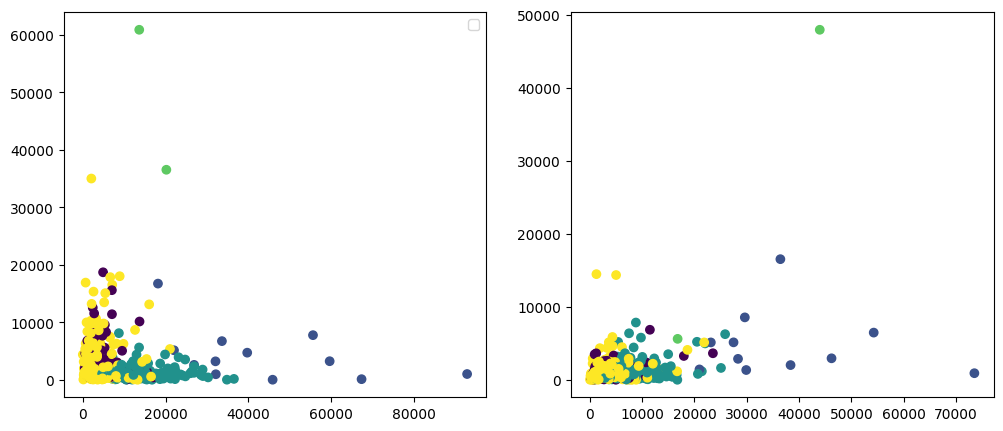

In [135]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(x = df.Grocery, y = df.Frozen,c = df.cluster)

plt.subplot(1,2,2)
plt.scatter(x = df.Milk, y = df.Delicassen,c = df.cluster)

plt.show()

In [138]:
import seaborn as sns

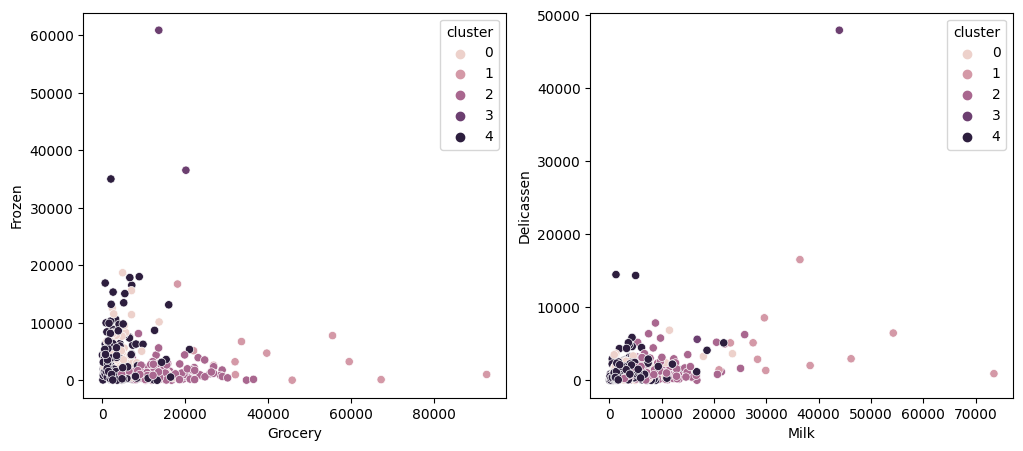

In [142]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data = df, x='Grocery', y='Frozen',hue = 'cluster')

plt.subplot(1,2,2)
sns.scatterplot(data = df, x='Milk', y='Delicassen',hue = 'cluster')

plt.show()

In [143]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,2
1,2,3,7057,9810,9568,1762,3293,1776,2
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,4
4,2,3,22615,5410,7198,3915,1777,5185,2


In [147]:
mask = (df['cluster'] == 3) | (df['cluster'] == 4)
df2 = df[~mask]

In [149]:
df2['cluster'].unique()

array([2, 1, 0])

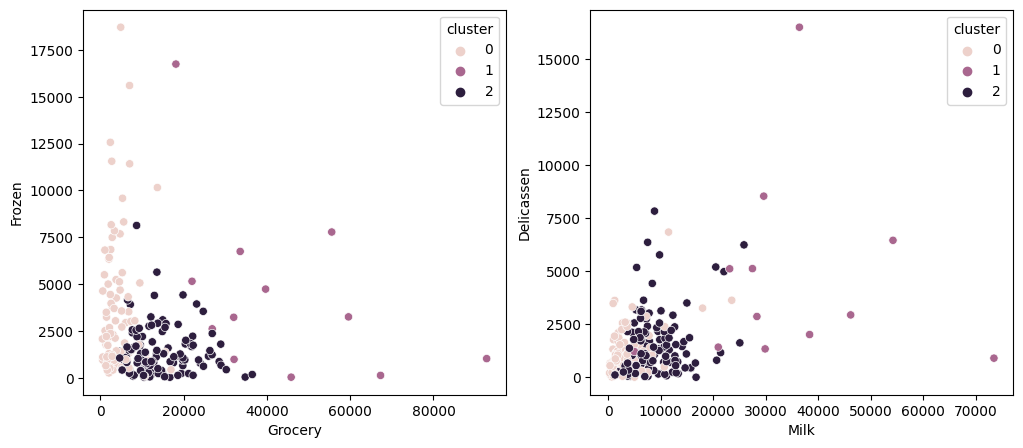

In [150]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(data = df2, x='Grocery', y='Frozen',hue = 'cluster')

plt.subplot(1,2,2)
sns.scatterplot(data = df2, x='Milk', y='Delicassen',hue = 'cluster')

plt.show()

# DBSCAN
    데이터가 위치한 공간 밀집도를기준으로 클러스터를 구분, core point 를 구해서 그 점을 기준으로 반지름 R을 정해서 원을 그리고
    그 원안에 들어오는 데이터를 군집으로 만들고 벗어난 데이터는 noise point

In [152]:
filepath = './2016_middle_shcool_graduates_report.xlsx'

In [173]:
pd.options.display.max_colwidth=None

In [174]:
df = pd.read_excel(filepath,header=0,index_col=0)

In [176]:
df.head(2)

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.000,0.011,0.227,0.000,0.004,0,0.0,37.594942,127.038909
1,종로구,서울대학교사범대학부설여자중학교,3,국립,주간,0,256,0.680,0.199,0.000,0.035,0.008,0.000,0.043,0.004,0.031,0,0.0,37.577473,127.003857


# 데이터 탐색

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 0 to 414
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지역      415 non-null    object 
 1   학교명     415 non-null    object 
 2   코드      415 non-null    int64  
 3   유형      415 non-null    object 
 4   주야      415 non-null    object 
 5   남학생수    415 non-null    int64  
 6   여학생수    415 non-null    int64  
 7   일반고     415 non-null    float64
 8   특성화고    415 non-null    float64
 9   과학고     415 non-null    float64
 10  외고_국제고  415 non-null    float64
 11  예고_체고   415 non-null    float64
 12  마이스터고   415 non-null    float64
 13  자사고     415 non-null    float64
 14  자공고     415 non-null    float64
 15  기타진학    415 non-null    float64
 16  취업      415 non-null    int64  
 17  미상      415 non-null    float64
 18  위도      415 non-null    float64
 19  경도      415 non-null    float64
dtypes: float64(12), int64(4), object(4)
memory usage: 68.1+ KB


In [182]:
df['주야'].unique()

array(['주간'], dtype=object)

In [186]:
from folium import Map,CircleMarker

In [196]:
school_map = Map(location = [37.594942,127.038909],zoom_start=12,tiles='Stamen Terrain')

In [197]:
for name,lat,lng in  zip(df.학교명, df.위도, df.경도):
    CircleMarker(
        [lat,lng]
        ,radius=5
        ,fill=True
        ,fill_color = 'coral'
        ,popup=name
    ).add_to(school_map)

In [198]:
school_map

In [207]:
# object 원핫인코딩 변경
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [210]:
onehot_location =  LabelEncoder().fit_transform(df['지역'])
onehot_code =  LabelEncoder().fit_transform(df['코드'])
onehot_type =  LabelEncoder().fit_transform(df['유형'])
onehot_day =  LabelEncoder().fit_transform(df['주야'])

In [211]:
df['location'] = onehot_location
df['code'] = onehot_code
df['type'] = onehot_type
df['day'] = onehot_day

In [213]:
pd.options.display.max_columns=None

In [215]:
df.head(2)
x = df.loc[:,['과학고','외고_국제고','자사고']]

In [216]:
x = StandardScaler().fit_transform(x)

In [217]:
from sklearn.cluster import DBSCAN

In [219]:
dbscan = DBSCAN(eps=0.2)

In [221]:
dbscan.fit(x)

DBSCAN(eps=0.2)

In [223]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3], dtype=int64)

In [224]:
df['cluster'] = dbscan.labels_

In [227]:
df.head(1)

,지역,학교명,코드,유형,주야,남학생수,여학생수,일반고,특성화고,과학고,외고_국제고,예고_체고,마이스터고,자사고,자공고,기타진학,취업,미상,위도,경도,location,code,type,day,cluster
0,성북구,서울대학교사범대학부설중학교,3,국립,주간,277,0,0.585,0.148,0.018,0.007,0.0,0.011,0.227,0.0,0.004,0,0.0,37.594942,127.038909,16,0,1,0,-1


In [228]:
grouped =  df.groupby(['cluster'])

In [229]:
colors = {
    -1:'gray',  0:'coral',  1:'blue',  2:'green',  3:'red'
}

In [230]:
cluster_map = Map(location = [37.594942,127.038909],zoom_start=12,tiles='Stamen Terrain')

In [235]:
for name,lat,lng,cluster in  zip(df.학교명, df.위도, df.경도,df.cluster):
    CircleMarker(
        [lat,lng]
        ,radius=5
        ,fill=True
        ,color = colors[cluster]
        ,popup=name
        ,fill_opacity = 0.7
    ).add_to(cluster_map)

In [236]:
cluster_map